# Avaliação dos algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- Knn: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch


### Preparação dos dados

In [1]:
from sklearn.model_selection import GridSearchCV # Classe que vai escolher qual os melhores algoritmos - CV de cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

In [2]:
# Carregar a base de dados
import pickle
with open('/content/drive/MyDrive/Machine Learning/Download/Bases de dados/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
# Preciso concatenar as bases X_credit treinamento e teste para uma só porque vamos usar o cross validation
X_credit = np.concatenate((X_credit_treinamento,X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis = 0)

### Árvore de decisão

In [4]:
parametros_tree = {'criterion' : ['gini', 'entropy'],
              'splitter' : ['best', 'random'],
              'min_samples_split' : [2, 5, 10],
              'min_samples_leaf' : [1, 5, 10]}

In [5]:
grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier( ), param_grid=parametros_tree)
grid_search_tree.fit(X_credit, y_credit)
melhores_parametros_tree = grid_search_tree.best_params_
melhor_resultado_tree = grid_search_tree.best_score_
print(melhores_parametros_tree)
print(melhor_resultado_tree)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


### Random Forest


In [6]:
parametros_random_forest = {'n_estimators' : [10 , 40, 100,150 ],
                            'criterion' : ['gini', 'entropy'],
                            'min_samples_split' : [2, 5, 10],
                            'min_samples_leaf' : [1, 5, 10],}

In [ ]:
grid_search_random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_random_forest)
grid_search_random_forest.fit(X_credit, y_credit)
melhores_parametros_random_forest = grid_search_random_forest.best_params_
melhor_resultado_random_forest = grid_search_random_forest.best_score_
print(melhores_parametros_random_forest)
print(melhor_resultado_random_forest)

### kNN

In [ ]:
parametros_knn = {'n_neighbors' : [3 , 5, 10, 20 ],
                  'p' : [1,2]}

In [ ]:
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros_knn)
grid_search_knn.fit(X_credit, y_credit)
melhores_parametros_knn = grid_search_knn.best_params_
melhor_resultado_knn = grid_search_knn.best_score_
print(melhores_parametros_knn)
print(melhor_resultado_knn)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


### Regressão Logística

In [ ]:
parametros_r_log = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
grid_search_r_log = GridSearchCV(estimator=LogisticRegression( ), param_grid=parametros_r_log)
grid_search_r_log.fit(X_credit, y_credit)
melhores_parametros_r_log = grid_search_r_log.best_params_
melhor_resultado_r_log = grid_search_r_log.best_score_
print(melhores_parametros_r_log)
print(melhor_resultado_r_log)

{'C': 1.0, 'solver': 'newton-cg', 'tol': 0.0001}
0.9484999999999999


### SVM

In [ ]:
parametros_svm = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=parametros_svm)
grid_search_svm.fit(X_credit, y_credit)
melhores_parametros_svm = grid_search_svm.best_params_
melhor_resultado_svm = grid_search_svm.best_score_
print(melhores_parametros_svm)
print(melhor_resultado_svm)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.0001}
0.9829999999999999


### Redes Neurais

In [ ]:
parametros_neural = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search_neural = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros_neural)
grid_search_neural.fit(X_credit, y_credit)
melhores_parametros_neural = grid_search_neural.best_params_
melhor_resultado_neural = grid_search_neural.best_score_


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
print(melhores_parametros_neural)
print(melhor_resultado_neural)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9975000000000002


## Validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  #print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
resultado = pd.DataFrame({'Árvore:' : resultados_arvore, 'Random Forest:' : resultados_random_forest,
                          'KNN:' : resultados_knn, 'Logistica:' : resultados_logistica,
                          'SVM:' : resultados_svm, 'Rede Neural:' : resultados_rede_neural})

In [ ]:
resultado

,Árvore:,Random Forest:,KNN:,Logistica:,SVM:,Rede Neural:
0,0.9865,0.9845,0.9815,0.9475,0.9845,0.9975
1,0.9845,0.9825,0.9800,0.9465,0.9840,0.9970
2,0.9905,0.9880,0.9795,0.9470,0.9865,0.9975
3,0.9875,0.9850,0.9780,0.9460,0.9850,0.9960
4,0.9890,0.9875,0.9820,0.9465,0.9850,0.9970
5,0.9890,0.9860,0.9780,0.9465,0.9845,0.9965
6,0.9880,0.9810,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9845,0.9800,0.9480,0.9850,0.9970
8,0.9865,0.9840,0.9795,0.9465,0.9840,0.9965
9,0.9875,0.9820,0.9820,0.9465,0.9845,0.9965


In [ ]:
resultado.describe()

,Árvore:,Random Forest:,KNN:,Logistica:,SVM:,Rede Neural:
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987267,0.984533,0.980050,0.946950,0.985083,0.996983
std,0.001794,0.002025,0.001533,0.000687,0.001280,0.000445
min,0.983000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.983000,0.979000,0.946500,0.984125,0.996625
50%,0.987500,0.984750,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.986000,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988000,0.982500,0.948500,0.987500,0.997500


In [ ]:
resultado.var()

Árvore:           3.219540e-06
Random Forest:    4.102299e-06
KNN:              2.350862e-06
Logistica:        4.715517e-07
SVM:              1.639368e-06
Rede Neural:      1.979885e-07
dtype: float64

In [ ]:
(resultado.std()/ resultado.mean()) * 100

Árvore:           0.181745
Random Forest:    0.205723
KNN:              0.156446
Logistica:        0.072517
SVM:              0.129977
Rede Neural:      0.044631
dtype: float64

## Teste de normalidade nos resultados

In [ ]:
import seaborn as sns
# Vamos usar o teste de SHAPIRO
alpha = 0.05

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(resultados_arvore), shapiro(resultados_random_forest),shapiro(resultados_knn),shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9651073217391968, 0.415260910987854),
 (0.9726542830467224, 0.6140557527542114),
 (0.9584026336669922, 0.28181564807891846),
 (0.9370993375778198, 0.07600117474794388),
 (0.962294340133667, 0.35407164692878723),
 (0.8533744812011719, 0.0007301644654944539))

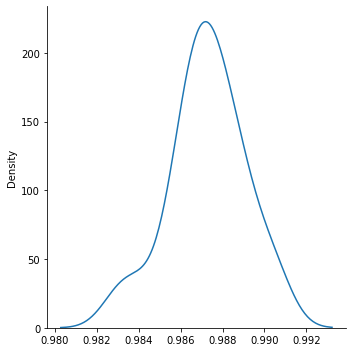

In [ ]:
sns.displot(resultados_arvore, kind='kde');

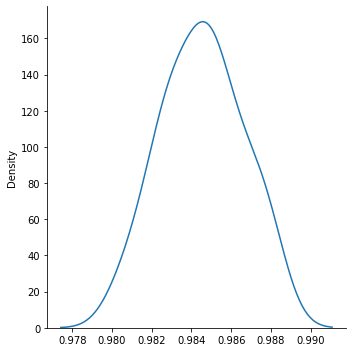

In [ ]:
sns.displot(resultados_random_forest, kind='kde');

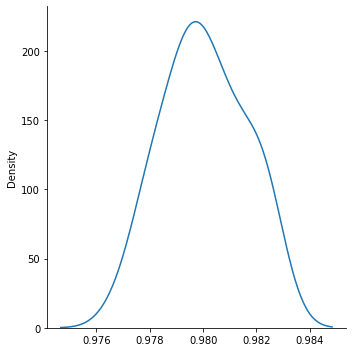

In [ ]:
sns.displot(resultados_knn, kind='kde');

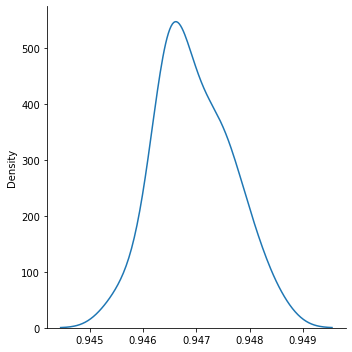

In [ ]:
sns.displot(resultados_logistica, kind='kde');

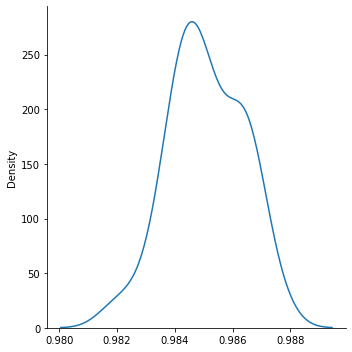

In [ ]:
sns.displot(resultados_svm, kind='kde');

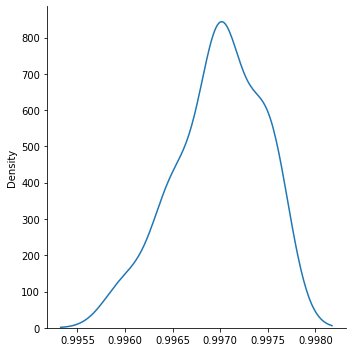

In [ ]:
sns.displot(resultados_rede_neural, kind='kde');

## Teste de hipótese usando a UNOVA e TOKEY

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn,resultados_logistica,resultados_svm, resultados_rede_neural)
p

1.7271538733717e-181

In [ ]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais.')

Hipótese nula rejeitada. Dados são diferentes


In [ ]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                          'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                           'random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest','random forest',
                           'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                           'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                           'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                           'rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural','rede neural',]}

In [ ]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [ ]:
teste_estatistico = compara_algoritmos.tukeyhsd()

In [ ]:
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0072  0.001 -0.0083 -0.0062   True
       arvore     logistica  -0.0403  0.001 -0.0414 -0.0393   True
       arvore random forest  -0.0027  0.001 -0.0038 -0.0017   True
       arvore   rede neural   0.0097  0.001  0.0087  0.0108   True
       arvore           svm  -0.0022  0.001 -0.0032 -0.0011   True
          knn     logistica  -0.0331  0.001 -0.0342  -0.032   True
          knn random forest   0.0045  0.001  0.0034  0.0055   True
          knn   rede neural   0.0169  0.001  0.0159   0.018   True
          knn           svm    0.005  0.001   0.004  0.0061   True
    logistica random forest   0.0376  0.001  0.0365  0.0386   True
    logistica   rede neural     0.05  0.001   0.049  0.0511   True
    logistica           svm   0.0381  0.001  0.0371  0.0392   

In [ ]:
resultado.mean()

Árvore:           0.987267
Random Forest:    0.984533
KNN:              0.980050
Logistica:        0.946950
SVM:              0.985083
Rede Neural:      0.996983
dtype: float64

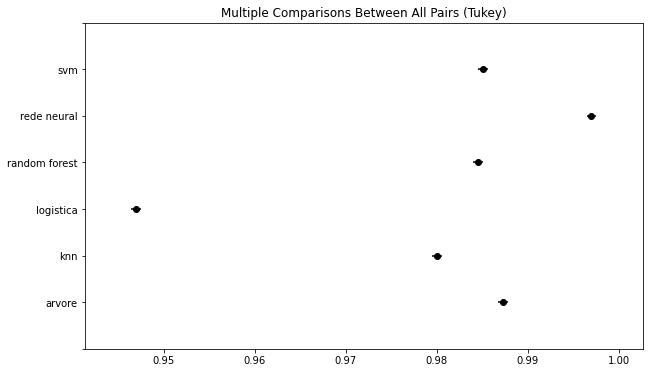

In [ ]:
teste_estatistico.plot_simultaneous();

## Salvar um classificador já treinado

In [ ]:
# Carregar a base de dados
import pickle
with open('/content/drive/MyDrive/Machine Learning/Download/Bases de dados/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
# Preciso concatenar as bases X_credit treinamento e teste para uma só porque vamos usar o cross validation
X_credit = np.concatenate((X_credit_treinamento,X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento,y_credit_teste), axis = 0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classificador_rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
classificador_rede_neural.fit(X_credit,y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(batch_size=56)

In [ ]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit,y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [ ]:
classificador_svm = SVC(kernel = 'rbf', C = 2.0)
classificador_svm.fit(X_credit,y_credit)

SVC(C=2.0)

In [ ]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

## Carregar um classificador já treinado

In [ ]:
import pickle
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [ ]:
novo_registro = X_credit[0]

In [ ]:
novo_registro = novo_registro.reshape(1,-1)

In [ ]:
novo_registro.shape

(1, 3)

In [ ]:
rede_neural.predict(novo_registro)

array([0])

In [ ]:
arvore.predict(novo_registro)

array([0])

In [ ]:
svm.predict(novo_registro)

array([0])

### Combinação dos classificadores